We will be able to decide the acceptability of the car by the current trends in the sales. The dataset we have taken is from Kaggle which describes the cars using various factors. The factors include the buying price, maintenance price, number of doors of the car, capacity of person, size of the luggage and safety. Using these factors, we will construct the decision tree and know if it gets accepted by the current trend of the market. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path=os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-acceptability-classification-dataset/car.csv
/kaggle/input/car-acceptability-classification-dataset/car.data


In [2]:
cars=pd.read_csv(path)
cars

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
new_cols={"vhigh":"Buying_Price","vhigh.1":"Maintenance_Price","2":"No_of_Doors","2.1":"Person_Capacity","small":"Size_of_Luggage","low":"Safety","unacc":"Car_Acceptability"}

In [4]:
cars=cars.rename(columns=new_cols)
cars

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
cars.describe()

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [6]:
cars.isnull().sum()

Buying_Price         0
Maintenance_Price    0
No_of_Doors          0
Person_Capacity      0
Size_of_Luggage      0
Safety               0
Car_Acceptability    0
dtype: int64

In [7]:
cars_columns=cars.columns
cars_columns

Index(['Buying_Price', 'Maintenance_Price', 'No_of_Doors', 'Person_Capacity',
       'Size_of_Luggage', 'Safety', 'Car_Acceptability'],
      dtype='object')

In [8]:
for i in cars_columns:
    print(i,"--->",cars[i].unique())

Buying_Price ---> ['vhigh' 'high' 'med' 'low']
Maintenance_Price ---> ['vhigh' 'high' 'med' 'low']
No_of_Doors ---> ['2' '3' '4' '5more']
Person_Capacity ---> ['2' '4' 'more']
Size_of_Luggage ---> ['small' 'med' 'big']
Safety ---> ['med' 'high' 'low']
Car_Acceptability ---> ['unacc' 'acc' 'vgood' 'good']


In [9]:
cars["No_of_Doors"]=cars["No_of_Doors"].replace("5more",5)

In [10]:
cars["Person_Capacity"]=cars["Person_Capacity"].replace("more",5)

In [11]:
encoder = LabelEncoder()
cars.iloc[:,[0,1,4,5,6]]=cars.iloc[:,[0,1,4,5,6]].apply(encoder.fit_transform)

In [12]:
cars

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety,Car_Acceptability
0,3,3,2,2,2,2,2
1,3,3,2,2,2,0,2
2,3,3,2,2,1,1,2
3,3,3,2,2,1,2,2
4,3,3,2,2,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,5,5,1,2,1
1723,1,1,5,5,1,0,3
1724,1,1,5,5,0,1,2
1725,1,1,5,5,0,2,1


In [13]:
for i in cars_columns:
    print(i,"--->",cars[i].unique())

Buying_Price ---> [3 0 2 1]
Maintenance_Price ---> [3 0 2 1]
No_of_Doors ---> ['2' '3' '4' 5]
Person_Capacity ---> ['2' '4' 5]
Size_of_Luggage ---> [2 1 0]
Safety ---> [2 0 1]
Car_Acceptability ---> [2 0 3 1]


In [14]:
cars_data=cars.iloc[:,:-1]
cars_data

,Buying_Price,Maintenance_Price,No_of_Doors,Person_Capacity,Size_of_Luggage,Safety
0,3,3,2,2,2,2
1,3,3,2,2,2,0
2,3,3,2,2,1,1
3,3,3,2,2,1,2
4,3,3,2,2,1,0
...,...,...,...,...,...,...
1722,1,1,5,5,1,2
1723,1,1,5,5,1,0
1724,1,1,5,5,0,1
1725,1,1,5,5,0,2


In [15]:
cars_label=encoder.fit_transform(cars.iloc[:,-1])
cars_label

array([2, 2, 2, ..., 2, 1, 3])

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [17]:
x_train,x_test,y_train,y_test=train_test_split(cars_data,cars_label,train_size=0.8,test_size=0.2)
print("x_train shape {} \ny_train shape{} \nx_test shape {} \ny_test shape{}".format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

x_train shape (1381, 6) 
y_train shape(1381,) 
x_test shape (346, 6) 
y_test shape(346,)


In [18]:
y_train=encoder.fit_transform(y_train)

In [19]:
DTree=DecisionTreeClassifier()

In [20]:
DTree.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=DTree.predict(x_test)

In [22]:
print("training accuracy =",DTree.score(x_train,y_train)*100)

training accuracy = 100.0


In [23]:
y_pred=DTree.predict(x_test)
acc=sum(y_pred==y_test)/len(y_pred)*100
print("Test Accuracy = {:.2f}".format(acc))
print(classification_report(y_test,y_pred))

Test Accuracy = 98.27
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        78
           1       0.86      1.00      0.92        12
           2       1.00      0.98      0.99       244
           3       1.00      0.92      0.96        12

    accuracy                           0.98       346
   macro avg       0.95      0.97      0.96       346
weighted avg       0.98      0.98      0.98       346



In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        78
           1       0.86      1.00      0.92        12
           2       1.00      0.98      0.99       244
           3       1.00      0.92      0.96        12

    accuracy                           0.98       346
   macro avg       0.95      0.97      0.96       346
weighted avg       0.98      0.98      0.98       346



As we see that the tree is overfitting, we use the post pruning method which is used to prune the branches selectively and by assigning the cost to each branch based on the impurities and the number of samples present in it. The sklearn provides us with the cost_complexity_pruning_path() function which gives us the ccp_alphas which is the threshold for pruning and the associated impurity with it. We plot the alphas values with the impurities.

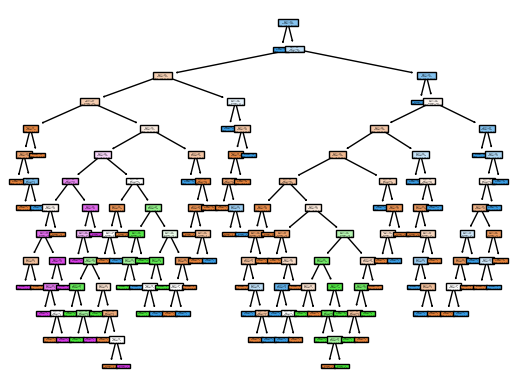

In [25]:
plt.figure()
tree.plot_tree(DTree,filled=True)
plt.show()


In [26]:
print("Depth of the tree",DTree.get_depth())
print("number of the leaf nodes of tree",DTree.get_n_leaves())

Depth of the tree 13
number of the leaf nodes of tree 87


In [27]:
DTree.get_n_leaves()

87

In [28]:
out=DTree.cost_complexity_pruning_path(x_train,y_train)

In [29]:
out

{'ccp_alphas': array([0.        , 0.00044251, 0.00045733, 0.00047004, 0.00054308,
        0.00060343, 0.00062067, 0.00062067, 0.00062067, 0.0006336 ,
        0.00066841, 0.00079652, 0.00091467, 0.00096548, 0.00096548,
        0.00096548, 0.00108617, 0.00118272, 0.00125513, 0.00139849,
        0.00140434, 0.00144823, 0.00151492, 0.00193097, 0.0022383 ,
        0.00229302, 0.00246735, 0.00296508, 0.00305811, 0.00403706,
        0.00405225, 0.00481333, 0.00603427, 0.00614297, 0.00627172,
        0.0064838 , 0.00656165, 0.00721583, 0.0125084 , 0.01311257,
        0.01337075, 0.01748563, 0.05757046, 0.07119659]),
 'impurities': array([0.        , 0.00132754, 0.00269954, 0.00410966, 0.00519583,
        0.00640268, 0.00764402, 0.00888536, 0.01012669, 0.01139389,
        0.01273071, 0.01671334, 0.01945734, 0.02042283, 0.02138831,
        0.02331928, 0.02440545, 0.02558817, 0.02809842, 0.03089541,
        0.03229975, 0.0351962 , 0.03822604, 0.04208798, 0.04656458,
        0.05115063, 0.05608532

Text(0.5, 1.0, 'training datset Impurity vs alphas')

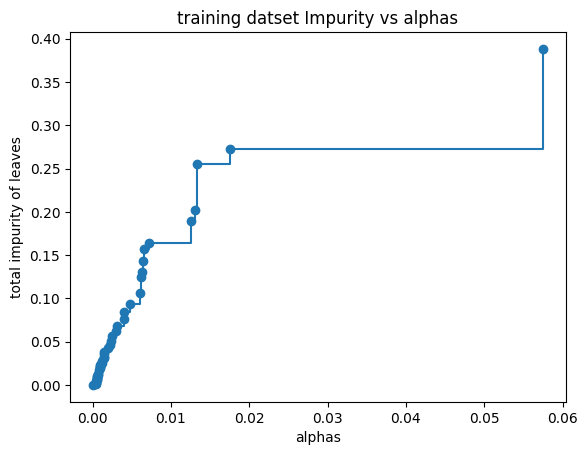

In [30]:
fig, ax = plt.subplots()
ax.plot(out["ccp_alphas"][:-1], out["impurities"][:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alphas")
ax.set_ylabel("total impurity of leaves")
ax.set_title("training datset Impurity vs alphas")

In [31]:
trees=[]
for i in out["ccp_alphas"]:
    tr=DecisionTreeClassifier(ccp_alpha=i)
    tr.fit(x_train,y_train)
    trees.append(tr)
    

In [32]:
train_scores=[i.score(x_train,y_train) for i in trees]
test_scores=[i.score(x_test,y_test) for i in trees]

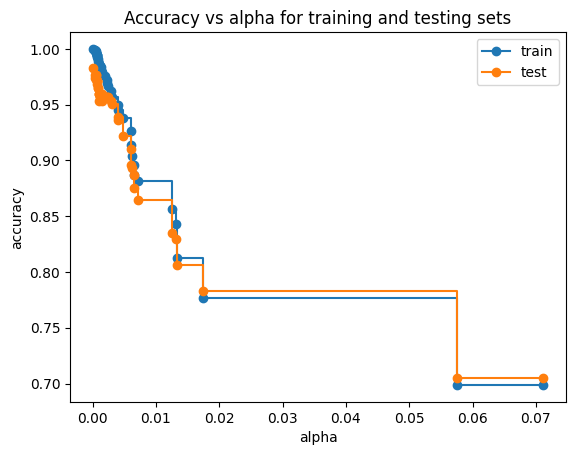

In [33]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(out["ccp_alphas"], train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(out["ccp_alphas"], test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

Building the decision tree classifier based on the alpha values as 0.01 which we got using the cost complexity pruning method, so that we avoid the overfitting of the data. even though the accuracy is 85.55 but the decision performs better for the unseen data after pruning the branches of the tree.

In [34]:
DTree_post_pruning=DecisionTreeClassifier(ccp_alpha=0.01)

In [35]:
DTree_post_pruning.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [36]:
y_pred=DTree_post_pruning.predict(x_test)
acc=sum(y_pred==y_test)/len(y_pred)*100
print("Test Accuracy = {:.2f}".format(acc))
print(classification_report(y_test,y_pred))

Test Accuracy = 86.42
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        78
           1       0.00      0.00      0.00        12
           2       0.97      0.91      0.94       244
           3       0.63      1.00      0.77        12

    accuracy                           0.86       346
   macro avg       0.57      0.69      0.61       346
weighted avg       0.86      0.86      0.86       346



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the decision tree after pruning, we see that the person_capacity is the first attribute we consider forming the decision and the next attribute is the safety. For example: if we I want to buy a car I want the person capacity to be 5, safety to be 3, luggage size to be 3 then according to the current trend the acceptability of the car is very good.

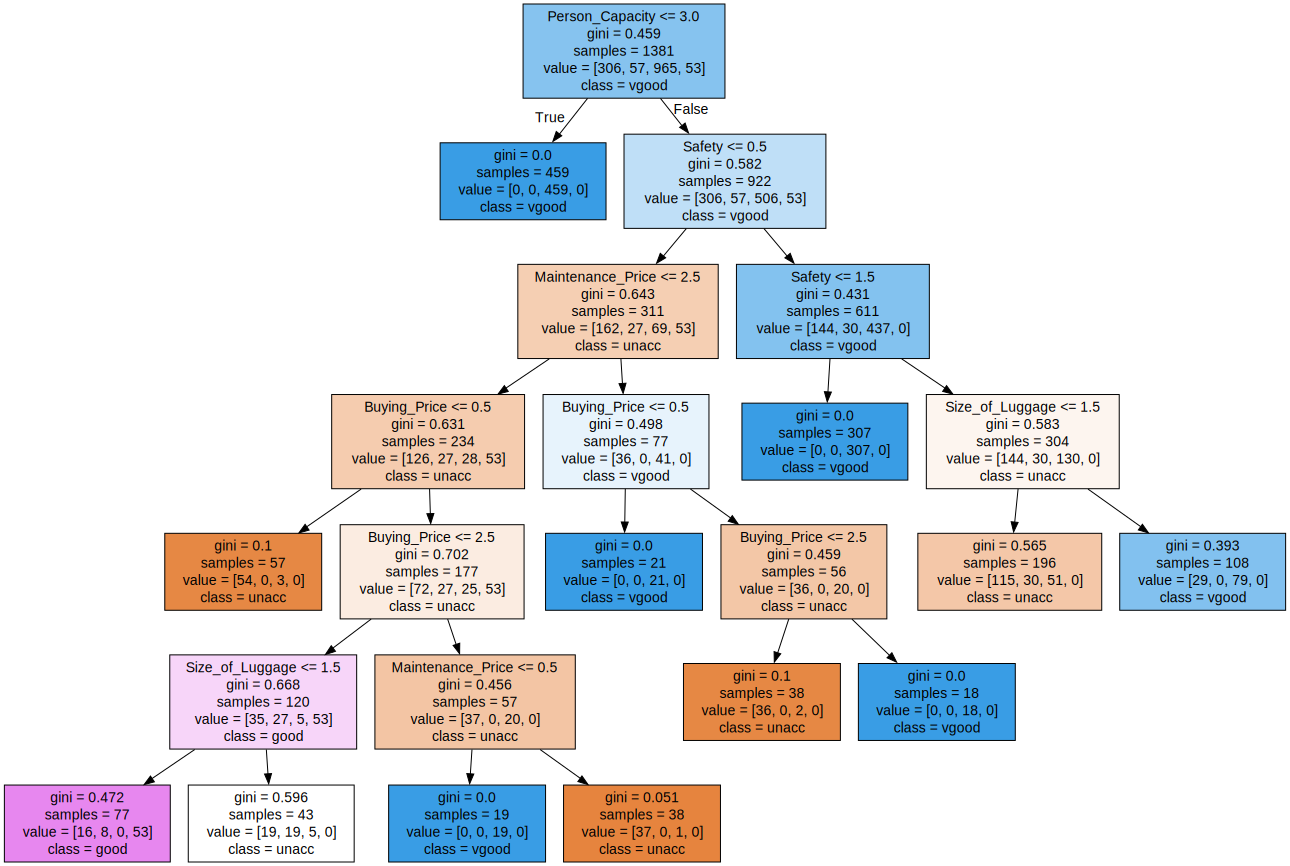

In [37]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(DTree_post_pruning, out_file=None, 
                                feature_names=cars_data.columns,  
                                class_names=['unacc','acc','vgood','good'],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [38]:
DTree_post_pruning

DecisionTreeClassifier(ccp_alpha=0.01)

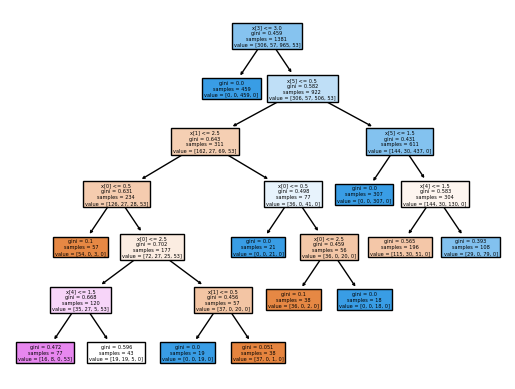

In [39]:
plt.figure()
tree.plot_tree(DTree_post_pruning,filled=True)
plt.show()
